### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler

In [2]:
# This option ensures the graphs created are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = r'/Users/faridchehraz/Desktop/Python/Master - USA Wildfires'

In [4]:
#Import US_wildfires pkl file

df = pd.read_pickle(os.path.join(path, '2. Data', 'b. Prepared Data', 'US_wildfires.pkl'))

### 2. Data cleaning

In [5]:
#Categorise wildfire causes & add to dataframe

def Cause_category(row):

  if row['NWCG_GENERAL_CAUSE'] in ('Natural'):
    return 'Natural'
  elif row['NWCG_GENERAL_CAUSE'] in ('Debris and open burning','Firearms and explosives use',
                                     'Misuse of fire by a minor'):
    return 'Accidental'
  elif row['NWCG_GENERAL_CAUSE'] in ('Equipment and vehicle use','Power generation/transmission/distribution',
                                   'Railroad operations and maintenance'):
    return 'Accidental Industry'
  elif row['NWCG_GENERAL_CAUSE'] in ('Arson/incendiarism'):
    return 'Malicious'
  elif row['NWCG_GENERAL_CAUSE'] in ('Fireworks','Recreation and ceremony','Smoking'):
    return 'Recreation'
  elif row['NWCG_GENERAL_CAUSE'] in ('Other causes','Missing data/not specified/undetermined'):
    return 'Other/Unknown'

  else: return np.nan

df['Cause_cat'] = df.apply(Cause_category, axis=1)

In [7]:
df.shape

(2166753, 16)

In [8]:
df.dtypes

FOD_ID                         int64
FIRE_YEAR                      int64
DISCOVERY_DATE        datetime64[ns]
DISCOVERY_DOY                  int64
NWCG_GENERAL_CAUSE            object
FIRE_SIZE                    float64
FIRE_SIZE_CLASS               object
LATITUDE                     float64
LONGITUDE                    float64
OWNER_DESCR                   object
STATE                         object
COUNTY                        object
FIPS_NAME                     object
DISC_MONTH                     int64
DISC_DOW                      object
Cause_cat                     object
dtype: object

In [9]:
df['DISC_DOW'].value_counts(dropna=False)

Saturday     344291
Sunday       318870
Monday       313742
Tuesday      299950
Friday       297890
Wednesday    297252
Thursday     294758
Name: DISC_DOW, dtype: int64

In [10]:
#Derive Disc_DOW_num using If-statement with the loc() function

df.loc[df['DISC_DOW'] == 'Monday', 'Disc_DOW_num'] = '1'
df.loc[df['DISC_DOW'] == 'Tuesday', 'Disc_DOW_num'] = '2'
df.loc[df['DISC_DOW'] == 'Wednesday', 'Disc_DOW_num'] = '3'
df.loc[df['DISC_DOW'] == 'Thursday', 'Disc_DOW_num'] = '4'
df.loc[df['DISC_DOW'] == 'Friday', 'Disc_DOW_num'] = '5'
df.loc[df['DISC_DOW'] == 'Saturday', 'Disc_DOW_num'] = '6'
df.loc[df['DISC_DOW'] == 'Sunday', 'Disc_DOW_num'] = '7'

In [11]:
#Change Disc_DOW_num to int64

df['Disc_DOW_num'] = df['Disc_DOW_num'].astype('int64')

In [12]:
df = df[['FIRE_YEAR','DISCOVERY_DOY','FIRE_SIZE','LATITUDE','LONGITUDE','Disc_DOW_num']]

In [13]:
df.dtypes

FIRE_YEAR          int64
DISCOVERY_DOY      int64
FIRE_SIZE        float64
LATITUDE         float64
LONGITUDE        float64
Disc_DOW_num       int64
dtype: object

Standardisation

In [14]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df)

### 2. The elbow technique

In [15]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [16]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-13953835152427.86,
 -5322185486619.906,
 -2752153792381.533,
 -1612945106530.8872,
 -1068656469688.2543,
 -727681102017.3298,
 -550982897599.0184,
 -434223793397.71747,
 -347098941292.96344]

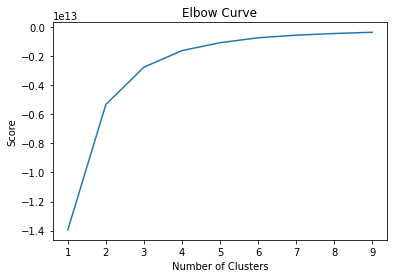

In [17]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

I have chosen to have four cluster as the line starts to level off at that point.

### 3. k-means clustering

In [18]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4, n_jobs = -1) 

In [19]:
# Fit the k-means object to the data.

kmeans.fit(df)

/Users/faridchehraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [20]:
df['clusters'] = kmeans.fit_predict(df)

/Users/faridchehraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [21]:
df.head()

,FIRE_YEAR,DISCOVERY_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,Disc_DOW_num,clusters
0,2005,33,0.10,40.036944,-121.005833,3,0
1,2004,133,0.25,38.933056,-120.404444,3,0
2,2004,152,0.10,38.984167,-120.735556,1,0
3,2004,180,0.10,38.559167,-119.913333,1,0
4,2004,180,0.10,38.559167,-119.933056,1,0


In [22]:
df['clusters'].value_counts()

0    2165433
2       1129
3        160
1         31
Name: clusters, dtype: int64

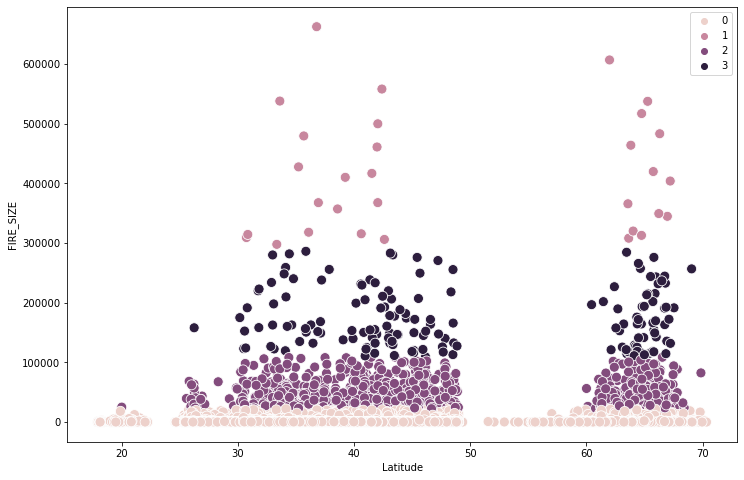

In [23]:
# Plot the clusters for the "Latitude" and "Fire size" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['LATITUDE'], y=df['FIRE_SIZE'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Latitude') # Label x-axis.
plt.ylabel('FIRE_SIZE') # Label y-axis.
##plt.show()

#### Observations taken from above scatterplot

- Unsure what the clusters are showing which could be a reslut of having >2 million data points
- Although not easily visible until the final scattergraph, the gaps in data points depict the geography of the country.
- No wildfires > 5,000 at 20 degrees Latitude which is Hawaii
- Large number of wildfires in Alaska, between 60 and 70 degrees Latitude

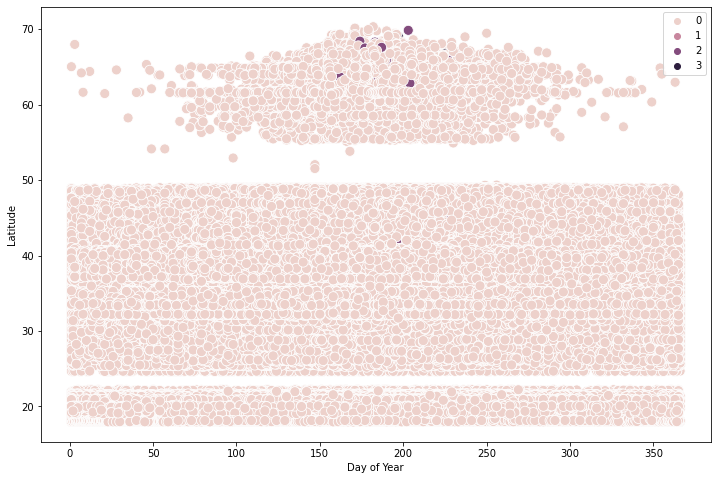

In [24]:
# Plot the clusters for the "Discovery day of year" and "Latitude" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['DISCOVERY_DOY'], y=df['LATITUDE'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Day of Year') # Label x-axis.
plt.ylabel('Latitude') # Label y-axis.
plt.show()

#### Observations taken from above scatterplot

- There are too many data points to take much from the graph so a smaller data sample could show more
- As above, the physical geography of the country can be noted from the graph
- In Alaska, which is identified in data points c. 60 and 70 degrees Latitude most wildfires ocurr between March & October which makes sense as the climate is considerably colder in the winter months

/Users/faridchehraz/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


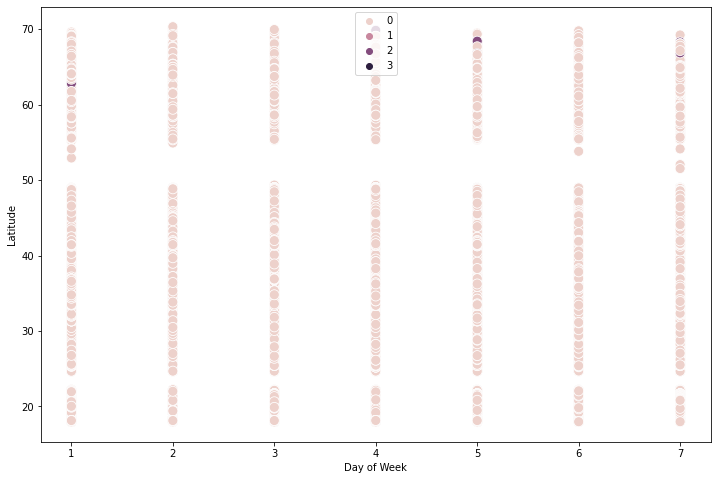

In [25]:
# Plot the clusters for the "Discovery day of week" and "Latitude" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Disc_DOW_num'], y=df['LATITUDE'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Day of Week') # Label x-axis.
plt.ylabel('Latitude') # Label y-axis.
plt.show()

#### Observations taken from above scatterplot

- There are too many data points to take much from the graph so a smaller data sample could show more
- As above, the physical geography of the country can be noted from the graph

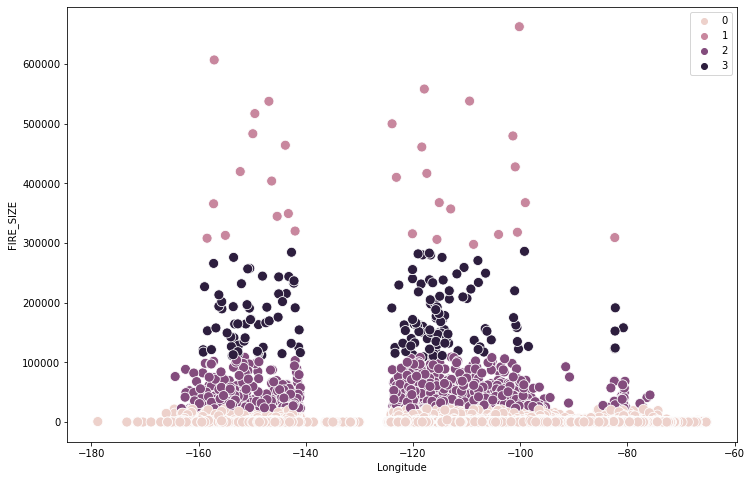

In [26]:
# Plot the clusters for the "Longitude" and "Fire size" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['LONGITUDE'], y=df['FIRE_SIZE'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Longitude') # Label x-axis.
plt.ylabel('FIRE_SIZE') # Label y-axis.
plt.show()

#### Observations taken from above scatterplot

- Unsure what the clusters are showing which could be a reslut of having >2 million data points
- Although not easily visible until the final scattergraph, the gaps in data points depict the geography of the country.

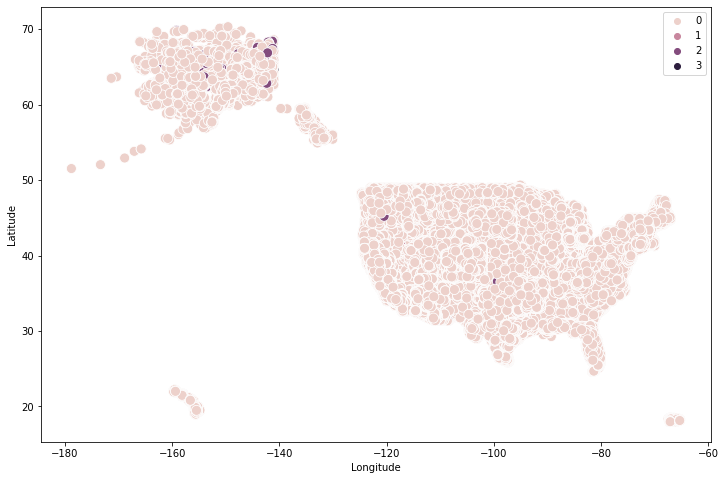

In [28]:
# Plot the clusters for the "Longitude" and "Latitude" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['LONGITUDE'], y=df['LATITUDE'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Longitude') # Label x-axis.
plt.ylabel('Latitude') # Label y-axis.
plt.show()

#### Observations taken from above scatterplot

- Clear visual depicting map of the USA although difficult to get insight due to the number of data points, >2 million.

In [29]:
df.loc[df['clusters'] == 3, 'cluster'] = 'Dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'Purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'Pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'Salmon'

In [31]:
df.head()

,FIRE_YEAR,DISCOVERY_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,Disc_DOW_num,clusters,cluster
0,2005,33,0.10,40.036944,-121.005833,3,0,Salmon
1,2004,133,0.25,38.933056,-120.404444,3,0,Salmon
2,2004,152,0.10,38.984167,-120.735556,1,0,Salmon
3,2004,180,0.10,38.559167,-119.913333,1,0,Salmon
4,2004,180,0.10,38.559167,-119.933056,1,0,Salmon


In [36]:
df.groupby('cluster').agg({'DISCOVERY_DOY':['mean', 'median'], 
                         'FIRE_SIZE':['mean', 'median'], 
                         'LATITUDE':['mean', 'median'],
                          'LONGITUDE':['mean', 'median'],
                          'Disc_DOW_num':['mean', 'median']}).round(2)

DISCOVERY_DOY         FIRE_SIZE            LATITUDE         \
                     mean median       mean     median     mean median   
cluster                                                                  
Dark purple        187.56  193.0  173457.51  161713.00    49.65  45.32   
Pink               158.16  167.0  414271.08  403993.00    49.17  42.04   
Purple             189.08  194.0   44309.80   38000.00    45.64  42.84   
Salmon             164.98  165.0      34.19       0.96    36.88  35.63   

            LONGITUDE         Disc_DOW_num         
                 mean  median         mean median  
cluster                                            
Dark purple   -126.77 -119.03         3.62    3.0  
Pink          -126.39 -120.12         4.71    6.0  
Purple        -121.14 -116.95         4.12    4.0  
Salmon         -96.18  -93.09         4.05    4.0

#### Observations taken from above statistics

- The 'Salmon' coloured cluster is clearly made up of the smallest wildfires. The high number could mean excluding this cluster and rerunning the scatterplots could show something on larger sized wildfires.
- The mean and median 'Discovery day of year' show most wildfires ocurr during the warmest months of the year which is intuitive